In [2]:
# Import necessary libraries
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Mount Google Drive
drive.mount('/content/drive')

# File path on Google Drive
file_path = '/content/drive/My Drive/Bird Detection DSGP/Bird migration dataset.csv'  # Replace with your file path

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display all columns horizontally and show only the first 10 rows
pd.set_option('display.max_columns', None)  # Ensure all columns are shown
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping of columns

# Displaying the first 10 rows
print(df.head(10))

Mounted at /content/drive
   ID  Migratory route codes    Migration nodes      Bird orders Bird families Bird genera English Name       Bird species Species Authority Migration type The IUCN Red List (2023)  Migration start year  Migration start month  Migration end year  Migration end month Sensor types  Continents (1 = North America, 2 = South America, 3 = Europe, 4 = Africa, 5 = Asia, 6 = Oceania)      Countries   Provinces      GPS_xx     GPS_yy  Migration patterns (1 = Intercontinental migration, 2 = Intracontinental migration)  Migration routes (1 = North America↔North America, 2 = South America↔South America, 3 = Europe↔Europe, 4 = Africa↔Africa, 5 = Asia↔Asia, 6 = Oceania↔Oceania, 7 = Europe→Africa, 8 = Africa→Europe, 9 = North America→South America, 10 = South America→North America, 11 = Europe→Asia, 12 = Asia→Europe, 13 = Asia→Africa, 14 = Africa→Asia, 15 = Europe→North America, 16 = North America→Europe, 17 = Asia→Oceania, 18 = Oceania→Asia, 19 = North America→Oceania, 20 = 

In [3]:
# Standardize column names by replacing spaces and special characters with underscores
df.columns = df.columns.str.replace(' ', '_').str.replace('[^A-Za-z0-9_]+', '', regex=True)

# Display corrected column names to verify changes
print("Updated column names: ", df.columns.tolist())

# Check unique values in 'Migration_type' after fixing column names
if 'Migration_type' in df.columns:
    print(df['Migration_type'].value_counts())
else:
    print("Column 'Migration_type' not found!")

# Dynamically fix column naming issues for 'Migration_routes'
for col in df.columns:
    if 'Migration_routes' in col:
        df.rename(columns={col: 'Migration_routes'}, inplace=True)

# Verify if renaming was successful
print("Final column names:", df.columns.tolist())

Updated column names:  ['ID', 'Migratory_route_codes', 'Migration_nodes', 'Bird_orders', 'Bird_families', 'Bird_genera', 'English_Name', 'Bird_species', 'Species_Authority', 'Migration_type', 'The_IUCN_Red_List_2023', 'Migration_start_year', 'Migration_start_month', 'Migration_end_year', 'Migration_end_month', 'Sensor_types', 'Continents_1__North_America_2__South_America_3__Europe_4__Africa_5__Asia_6__Oceania', 'Countries', 'Provinces', 'GPS_xx', 'GPS_yy', 'Migration_patterns_1__Intercontinental_migration_2__Intracontinental_migration', 'Migration_routes_1__North_AmericaNorth_America_2__South_AmericaSouth_America_3__EuropeEurope_4__AfricaAfrica_5__AsiaAsia_6__OceaniaOceania_7__EuropeAfrica_8__AfricaEurope_9__North_AmericaSouth_America_10__South_AmericaNorth_America_11__EuropeAsia_12__AsiaEurope_13__AsiaAfrica_14__AfricaAsia_15__EuropeNorth_America_16__North_AmericaEurope_17__AsiaOceania_18__OceaniaAsia_19__North_AmericaOceania_20__OceaniaNorth_America_21__North_AmericaAsia', 'Reference

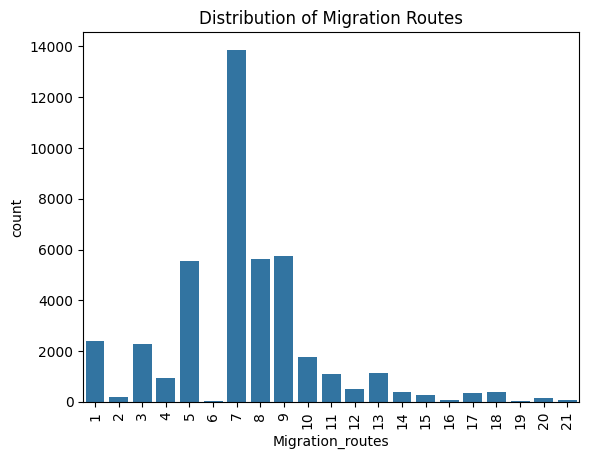

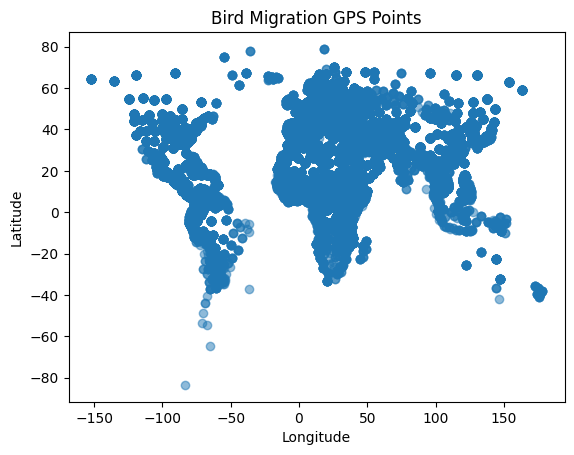

In [4]:
# Plot migration routes if column exists
if 'Migration_routes' in df.columns:
    sns.countplot(data=df, x='Migration_routes')
    plt.title('Distribution of Migration Routes')
    plt.xticks(rotation=90)
    plt.show()
else:
    print("Column 'Migration_routes' not found for plotting.")

# Scatter plot for GPS coordinates if columns exist
if 'GPS_xx' in df.columns and 'GPS_yy' in df.columns:
    plt.scatter(df['GPS_xx'], df['GPS_yy'], alpha=0.5)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Bird Migration GPS Points')
    plt.show()
else:
    print("GPS columns not found!")

In [5]:
import pandas as pd
# Fix column name issues related to 'Migration patterns'
for col in df.columns:
    if 'Migration' in col and 'pattern' in col.lower():
        df.rename(columns={col: 'Migration_patterns'}, inplace=True)

# Verify changes after renaming
print("Updated column names:", df.columns.tolist())

# Convert Migration_patterns into binary classification (1 for Intercontinental, 0 for Intracontinental)
df['Bird_presence'] = df['Migration_patterns'].apply(lambda x: 1 if x == 1 else 0)

# Selecting features and target variable
required_columns = ['Migration_start_year', 'Migration_start_month', 'GPS_xx', 'GPS_yy']

# Ensure all required columns exist in the DataFrame
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    print(f"Missing columns: {missing_cols}")
else:
    X = df[required_columns]
    y = df['Bird_presence']  # Using the new binary target variable

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the Random Forest model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = rf_model.predict(X_test)
    print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # Save the model for fine-tuning later
    import joblib
    joblib.dump(rf_model, '/content/drive/My Drive/Bird Detection DSGP/rf_model.pkl')
    print("Model saved for future fine-tuning.")

    import joblib

model_path = "rf_model_compressed.pkl"
joblib.dump(rf_model, model_path, compress=("gzip", 3))  # Use gzip for better compression

print(f"Model saved as: {model_path}")



Updated column names: ['ID', 'Migratory_route_codes', 'Migration_nodes', 'Bird_orders', 'Bird_families', 'Bird_genera', 'English_Name', 'Bird_species', 'Species_Authority', 'Migration_type', 'The_IUCN_Red_List_2023', 'Migration_start_year', 'Migration_start_month', 'Migration_end_year', 'Migration_end_month', 'Sensor_types', 'Continents_1__North_America_2__South_America_3__Europe_4__Africa_5__Asia_6__Oceania', 'Countries', 'Provinces', 'GPS_xx', 'GPS_yy', 'Migration_patterns', 'Migration_routes', 'References', 'Publish_time', 'DOI']
Random Forest Accuracy: 0.9328976543353951
              precision    recall  f1-score   support

           0       0.90      0.85      0.87      2366
           1       0.94      0.97      0.95      6203

    accuracy                           0.93      8569
   macro avg       0.92      0.91      0.91      8569
weighted avg       0.93      0.93      0.93      8569

Model saved for future fine-tuning.
Model saved as: rf_model_compressed.pkl


In [6]:
import pandas as pd

# Load the manually categorized bird size mapping
size_mapping_path = "/content/drive/My Drive/Bird Detection DSGP/bird_size_mapping.csv"
size_mapping = pd.read_csv(size_mapping_path)

# Display first few rows
print(size_mapping.head())

# Check if 'Bird_size' column exists
if 'Bird_size' in size_mapping.columns:
    print("✅ 'Bird_size' column found in bird_size_mapping.csv")
else:
    print("❌ 'Bird_size' column is missing! Please check the file.")


        Bird_species Bird_size
0  Pandion haliaetus     Large
1    Falco eleonorae    Medium
2        Buteo buteo    Medium
3    Clanga pomarina    Medium
4    Grus japonensis     Large
✅ 'Bird_size' column found in bird_size_mapping.csv


In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/My Drive/Bird Detection DSGP/Bird migration dataset.csv')

# Load the manually assigned bird size mapping
size_mapping = pd.read_csv('/content/drive/My Drive/Bird Detection DSGP/bird_size_mapping.csv')

# Standardize column names
df.columns = df.columns.str.replace(' ', '_').str.strip()
size_mapping.columns = size_mapping.columns.str.replace(' ', '_').str.strip()

# Ensure 'Bird_species' column exists in both datasets
if 'Bird_species' not in df.columns or 'Bird_species' not in size_mapping.columns:
    raise KeyError("Column 'Bird_species' is missing in one of the datasets. Check column names.")

# Merge datasets
df = df.merge(size_mapping, on='Bird_species', how='left')

# Check if 'Bird_size' exists
if 'Bird_size' in df.columns:
    print("✅ 'Bird_size' successfully merged into dataset!")
    print(df[['Bird_species', 'Bird_size']].head())  # Show some sample data
else:
    print("❌ 'Bird_size' column is still missing! Check size mapping file.")

print(size_mapping.columns)


✅ 'Bird_size' successfully merged into dataset!
        Bird_species Bird_size
0  Pandion haliaetus     Large
1  Pandion haliaetus     Large
2  Pandion haliaetus     Large
3  Pandion haliaetus     Large
4  Pandion haliaetus     Large
Index(['Bird_species', 'Bird_size'], dtype='object')


In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

# Convert 'Bird_size' to numerical categories
label_encoder = LabelEncoder()
df['Bird_size_encoded'] = label_encoder.fit_transform(df['Bird_size'])

# Encode categorical features
df['Bird_families_encoded'] = LabelEncoder().fit_transform(df['Bird_families'])
df['Migration_type_encoded'] = LabelEncoder().fit_transform(df['Migration_type'])

# Define feature list
features = ['Migration_start_year', 'Migration_start_month', 'Migration_end_month', 'GPS_xx', 'GPS_yy', 'Bird_families_encoded', 'Migration_type_encoded']

# Normalize input features
scaler = MinMaxScaler()
X = scaler.fit_transform(df[features])

# Convert labels to one-hot encoding
one_hot_encoder = OneHotEncoder(sparse_output=False)
y_one_hot = one_hot_encoder.fit_transform(df['Bird_size_encoded'].values.reshape(-1, 1))

# Reshape input data for LSTM
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Build improved LSTM model
model = Sequential([
    Bidirectional(LSTM(100, activation='relu', return_sequences=True), input_shape=(1, X.shape[2])),
    Dropout(0.3),
    LSTM(50, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 output neurons for Small, Medium, Large
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, min_lr=0.0001)

# Train the model
model.fit(X_train, y_train, epochs=150, batch_size=64, validation_split=0.2, callbacks=[lr_scheduler])

# Evaluate the model
accuracy = model.evaluate(X_test, y_test)[1]
print("Updated LSTM Model Accuracy:", accuracy)

# Save the model
model.save("/content/drive/My Drive/Bird Detection DSGP/improved_lstm_bird_size_model.h5")
print("✅ Improved LSTM model saved successfully!")

# Save the model in Keras format
model.save("/content/drive/My Drive/Bird Detection DSGP/improved_lstm_bird_size_model.keras", save_format='keras')
print("✅ Improved LSTM model saved in Keras format successfully!")


Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


429/429 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.6039 - loss: 0.8970 - val_accuracy: 0.7739 - val_loss: 0.5642 - learning_rate: 0.0010
Epoch 2/150
429/429 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7764 - loss: 0.5824 - val_accuracy: 0.8230 - val_loss: 0.4939 - learning_rate: 0.0010
Epoch 3/150
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8074 - loss: 0.5256 - val_accuracy: 0.8394 - val_loss: 0.4543 - learning_rate: 0.0010
Epoch 4/150
429/429 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8269 - loss: 0.4742 - val_accuracy: 0.8570 - val_loss: 0.4021 - learning_rate: 0.0010
Epoch 5/150
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8375 - loss: 0.4405 - val_accuracy: 0.8509 - val_loss: 0.3836 - learning_rate: 0.0010
Epoch 6/150
429/429 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8467 - loss: 0.4183 - val_accuracy: 0.8878 - val_loss: 0.3292 - learning_rate: 0.0010
Epoch 7/150
429/429 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8583 - loss: 0.3823 - v

Updated LSTM Model Accuracy: 0.9913642406463623


✅ Improved LSTM model saved successfully!
✅ Improved LSTM model saved in Keras format successfully!


268/268 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


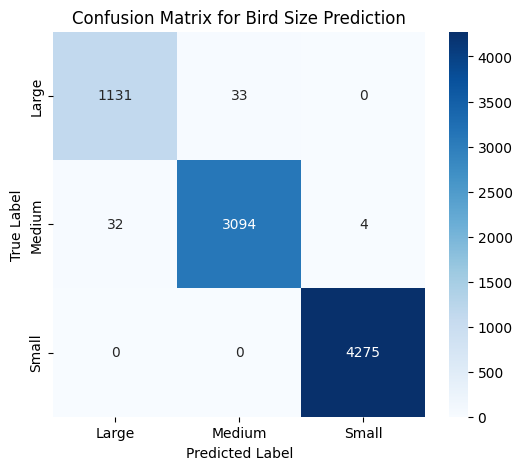

Classification Report:
               precision    recall  f1-score   support

       Large       0.97      0.97      0.97      1164
      Medium       0.99      0.99      0.99      3130
       Small       1.00      1.00      1.00      4275

    accuracy                           0.99      8569
   macro avg       0.99      0.99      0.99      8569
weighted avg       0.99      0.99      0.99      8569



In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the saved model
model = tf.keras.models.load_model("/content/drive/My Drive/Bird Detection DSGP/improved_lstm_bird_size_model.h5")

# Make predictions on the test set
y_pred_prob = model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Convert actual one-hot encoded labels back to original class labels
y_true = np.argmax(y_test, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Display confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Bird Size Prediction")
plt.show()

# Print classification report for performance metrics
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=label_encoder.classes_))


In [ ]:
model.save("/content/drive/My Drive/Bird Detection DSGP/final_lstm_bird_size_model.h5")

In [ ]:
# Extract all unique bird species
species_list = df['Bird_species'].unique()

# Create a DataFrame with an empty 'Bird_size' column
species_df = pd.DataFrame({'Bird_species': species_list, 'Bird_size': ''})  # Fill 'Bird_size' manually

# Save to CSV for manual editing
species_df.to_csv('/content/drive/My Drive/Bird Detection DSGP/bird_size_mapping.csv', index=False)

print("Bird species list saved. Please manually assign Small, Medium, or Large in the CSV file.")


Bird species list saved. Please manually assign Small, Medium, or Large in the CSV file.


In [ ]:
# Load the manually categorized bird size data
size_mapping = pd.read_csv('/content/drive/My Drive/Bird Detection DSGP/bird_size_mapping.csv')

# Merge it with the main dataset
df = df.merge(size_mapping, on='Bird_species', how='left')

# Verify that sizes are assigned correctly
print(df[['Bird_species', 'Bird_size']].head())


        Bird_species Bird_size
0  Pandion haliaetus     Large
1  Pandion haliaetus     Large
2  Pandion haliaetus     Large
3  Pandion haliaetus     Large
4  Pandion haliaetus     Large
